<a href="https://colab.research.google.com/github/Jasminewakini/WK8_IP_CORE/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_02_Jasmine_Wakini_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Nairobi Hospital clinical test for hypothyroidism

## 1. Defining the Question

### a) Specifying the Question

>  Determineing whether or not a patient's symptoms indicate that the patient has hypothyroid 


### b) Defining the Metric for Success

> We will be able to identify through 0 and 1, whether or not respectively if the patient has hypothyroid with a model of an accuracy of above 80%

### c) Understanding the context 

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. \
 The task was to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



*   Part 1: Decision trees:
*   Part 2: Support Vector Machine



### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis recording your observations.

6. Decision trees.

*   Random forests.
*   Gradient boosted trees


7. Support Vector Machine.

*  Polynomial Function
*  Radial Basis Function
*  Sigmoid Functioon  

8. Challenge your solution by providing insights on how you can make improvements in model improvement.

*   Ada boosted trees.

### e) Data Relevance

The data relevance will be discussed after the analysis is complete.

## 2. Reading the Data

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Dataset
# -----------
#

hypothyroid = pd.read_csv("hypothyroid.csv")
hypothyroid


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
hypothyroid.shape

(3163, 26)

In [ ]:
# Previewing the top of our dataset
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Previewing the bottom of our dataset
# 
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Checking whether each column has an appropriate datatype
#
hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# Printing the unique values
 
columns = hypothyroid.columns
for i in columns:
  print('Unique values in', i , 'are :')
  print(hypothyroid[i].unique())
  print('                                                                           ')
  print('***************************************************************************')


Unique values in status are :
['hypothyroid' 'negative']
                                                                           
***************************************************************************
Unique values in age are :
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
                                                                           
***************************************************************************
Unique values in sex are :
['M' 'F' '?']
                                                                           
******************************

In [ ]:
# Checking for descriptive info
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# Showing the statistical descriptions
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

## 5. Tidying the Dataset

In [ ]:
# Checking for the columns in our dataset

hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Checking for missing values
hypothyroid.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

> There are no missing values this is because of the presence of the '?'

In [ ]:
# Replacing the '?' value with NaN for missing values
hypothyroid.replace(to_replace='?', inplace=True, value=np.NaN)

# Checking for the number of missing values now
hypothyroid.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
# Converting the column datatypes to their respective datatypes
# Categorical columns
cat_cols = ['status', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# Numerical columns array 
num_cols = ['age','TSH','T3', 'TT4', 'T4U', 'FTI', 'TBG']

# for loop for converting columns to the right data types
for column in hypothyroid.columns:
  if column in num_cols:
    hypothyroid[column] = hypothyroid[column].astype('float')
  elif column in cat_cols:
    hypothyroid[column] = hypothyroid[column].astype('category')


In [ ]:
# Confirming if we have the correct datatypes
hypothyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
# Replacing our missing values with mean
miss_col = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in miss_col:
  hypothyroid[col].fillna(hypothyroid[col].mean(), inplace = True)

# Replacing for the sex column with mode because it is a categorical data
hypothyroid['sex'].fillna(hypothyroid['sex'].mode(), inplace = True)

# Drop the TBG_measured and TBG because almost all their records are null
hypothyroid.drop(['TBG','TBG_measured'], axis=1, inplace=True)


# Confirming all the null values ahve been replaced
hypothyroid.isna().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
dtype: int64

In [ ]:
# Using mode still leaves us with some missing values, therefore we opt to go with filling the 
# missing values with 'F' because it the mode value
hypothyroid['sex'].fillna('F', inplace = True)

In [ ]:
# Checking if all the missingvalues were replaced
hypothyroid.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

> All the missing values have been replaced

In [ ]:
# Identify duplicate data and drop it

hypothyroid = hypothyroid.drop_duplicates()

# check the shape of the data to see if there were any duplicates
hypothyroid.shape

(3007, 24)

> The shape was initially (3163, 26) after dropping 2 columns and some duplicates we have (3007, 24), we dropped 156 duplicate records

In [ ]:
hypothyroid['age'].unique()

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

In [ ]:
# Standardizing/Encoding our categorical columns
# encoding the true / false categorical columns
cat_cols = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
       'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre']

# looping through the columns to encode
for col in cat_cols:

  cat_enc = {col:{'f':0,'t':1}}

# Replacing the new values
  hypothyroid.replace(cat_enc, inplace=True)

# Changing the datatype from categorical to int
  hypothyroid[col].astype(int)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Standardizing/Encoding our numerical columns
# encoding the yes / no categorical columns
num_cols = ['TSH_measured','T3_measured','TT4_measured','T4U_measured',
       'FTI_measured']

# looping through the columns to encode
for col in num_cols:

  num_enc = {col:{'y':0,'n':1}}


# Replacing the new values
  hypothyroid.replace(num_enc, inplace=True)

# Changing the datatype from categorical to int
  hypothyroid[col].astype(int)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# We use map to apply a transformation function to each item male and female 
# in an iterable and transform them into a new iterable 1 and 2
# ----------------
#

num_cols = ['sex']

# looping through the columns to encode
for col in num_cols:

  num_enc = {col:{'M':0, 'F':1}}


# Replacing the new values
  hypothyroid.replace(num_enc, inplace=True)

# Changing the datatype from categorical to int
  hypothyroid[col].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Conirming to see that all the encoding was done successfully

hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


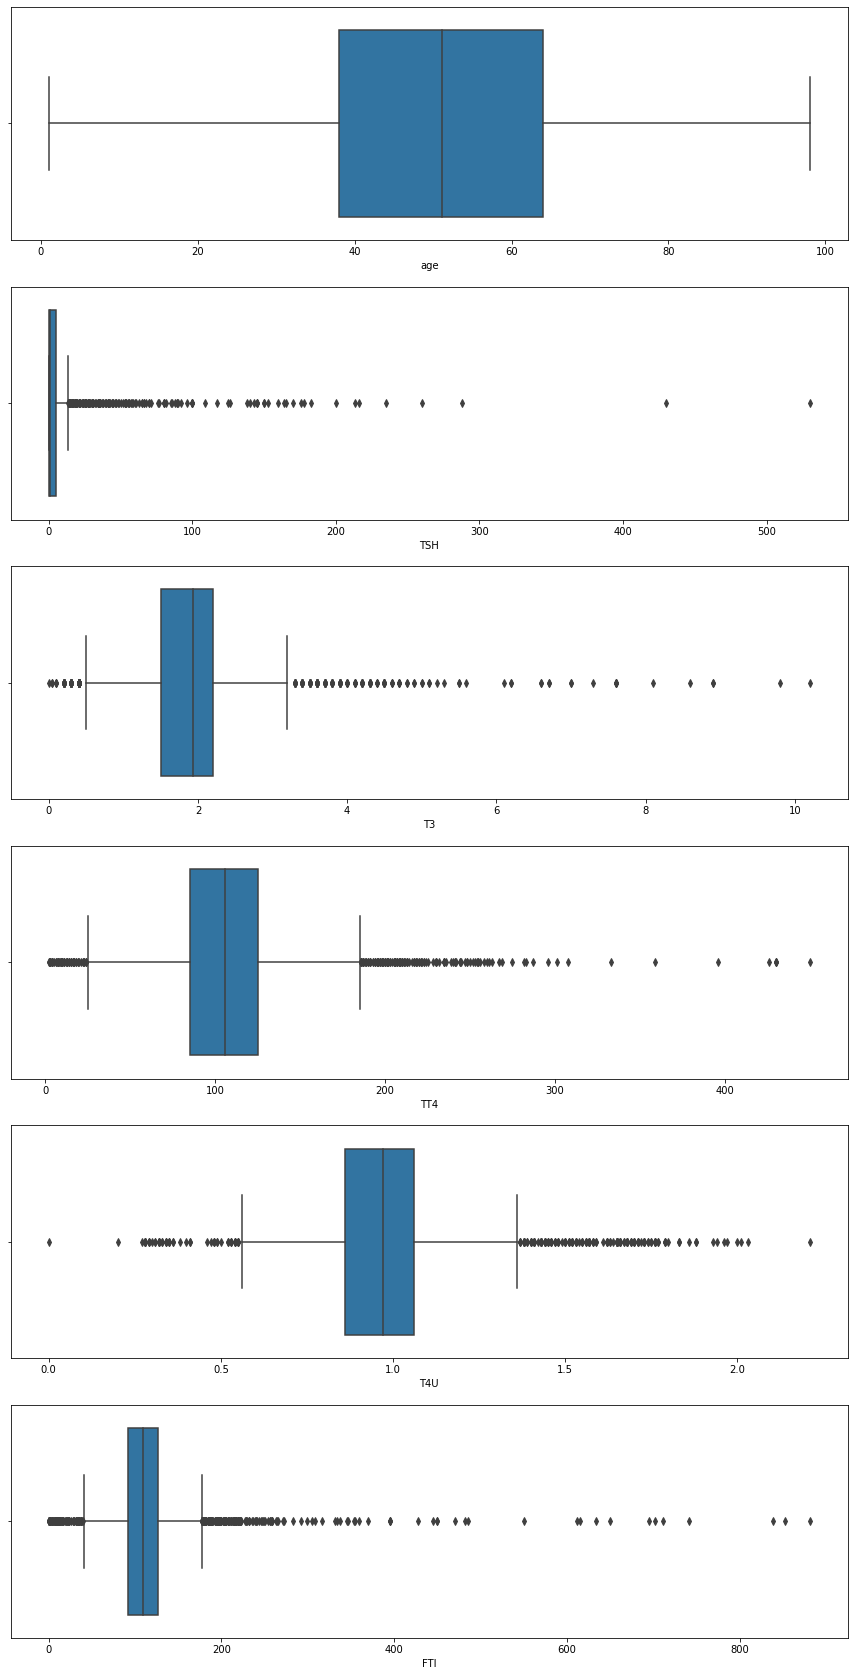

In [ ]:
# Checking for Outliers
# We chose thebelow column because they are the ones mostly likely to have outliers than the other 0 or 1 columns

col_names = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
fig, ax = plt.subplots(len(col_names), figsize = (15,30))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = hypothyroid[col_val], ax=ax[i])
    #ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    
plt.show()

> Outliers are present although we will not remove them because this might skew our data and also the values in our data are subjective and they represent real life situations

In [ ]:
# Checking for Anomalies
#
def check_Anomalies(Df,col_name):
  q1 = Df[col_name].quantile(0.25)
  q3 = Df[col_name].quantile(0.75)
  
  #Interquartile range points
  iqr_points = q3-q1 
  return iqr_points

# Identifying the particular columns for removing outliers
iqr_points_age = check_Anomalies(hypothyroid,'age')
iqr_points_TSH = check_Anomalies(hypothyroid,'TSH')
iqr_points_T3 = check_Anomalies(hypothyroid,'T3')
iqr_points_TT4 = check_Anomalies(hypothyroid,'TT4')
iqr_points_T4U = check_Anomalies(hypothyroid,'T4U')
iqr_points_FTI = check_Anomalies(hypothyroid,'FTI')

In [ ]:
# Printing the anomalies
print('Age ', iqr_points_age)
print('TSH ', iqr_points_TSH)
print('T3 ', iqr_points_T3)
print('TT4 ', iqr_points_TT4)
print('T4U ', iqr_points_T4U)
print('FTI ', iqr_points_FTI)

Age  26.0
TSH  5.300000000000001
T3  0.7000000000000002
TT4  40.0
T4U  0.20000000000000007
FTI  34.0


In [ ]:
# confirming and copying the cleaned dataset
#
hypothyroid.head()

# Making a copy of the clean dataset
thyroid_clean = hypothyroid.copy()
thyroid_clean.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


## 6. Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# Displaying the statistical info
thyroid_clean.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,51.350030,0.704357,0.148321,0.018291,0.013967,0.034253,0.078151,0.075491,0.020286,0.032258,0.013302,0.000665,0.031593,0.125042,5.823557,0.199867,1.934882,0.053542,108.714583,0.053209,0.977593,0.052877,115.484252
std,17.864731,0.456407,0.355477,0.134023,0.117375,0.181910,0.268454,0.264225,0.141000,0.176714,0.114585,0.025786,0.174943,0.330821,22.470602,0.399967,0.876120,0.225149,43.395720,0.224488,0.219705,0.223824,58.535310
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,85.000000,0.000000,0.860000,0.000000,92.000000
50%,51.154214,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.939749,0.000000,106.000000,0.000000,0.970000,0.000000,109.000000
75%,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.300000,0.000000,2.200000,0.000000,125.000000,0.000000,1.060000,0.000000,126.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000


In [ ]:
# Finding the measures of central tendencies

anomalies_columns = ['age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
for column in anomalies_columns:
  print('\n')
  print(column + ', Mean: '+ str(thyroid_clean[column].mean()))
  print(column + ', Mode: '+ str(thyroid_clean[column].mode()))
  print(column + ', Median: '+ str(thyroid_clean[column].median()))
  print(column + ', Standard deviation: '+ str(thyroid_clean[column].std()))
  print(column + ', Variance: '+ str(thyroid_clean[column].var()))
  print(column + ', Skewness: '+ str(thyroid_clean[column].skew()))
  print(column + ', Kurtosis: '+ str(thyroid_clean[column].kurt()))
  print(column + ', Max: '+ str(thyroid_clean[column].max()))
  print(column + ', Min: '+ str(thyroid_clean[column].min()))
  print(column + ', Range: '+ str(thyroid_clean[column].max() - thyroid_clean[column].min()))
  print(column + ', Quantile:\n'+ str(thyroid_clean[column].quantile([0.25,0.5,0.75])))



age, Mean: 51.3500302753277
age, Mode: 0    51.154214
dtype: float64
age, Median: 51.154214206845786
age, Standard deviation: 17.864730565566024
age, Variance: 319.14859818026895
age, Skewness: -0.19784403314342464
age, Kurtosis: -0.6106397545900806
age, Max: 98.0
age, Min: 1.0
age, Range: 97.0
age, Quantile:
0.25    38.000000
0.50    51.154214
0.75    64.000000
Name: age, dtype: float64


on_thyroxine, Mean: 0.14832058530096442
on_thyroxine, Mode: 0    0
dtype: int64
on_thyroxine, Median: 0.0
on_thyroxine, Standard deviation: 0.3554765989865869
on_thyroxine, Variance: 0.1263636124270707
on_thyroxine, Skewness: 1.9799529901022737
on_thyroxine, Kurtosis: 1.921491413019612
on_thyroxine, Max: 1
on_thyroxine, Min: 0
on_thyroxine, Range: 1
on_thyroxine, Quantile:
0.25    0.0
0.50    0.0
0.75    0.0
Name: on_thyroxine, dtype: float64


query_on_thyroxine, Mean: 0.018290655138011307
query_on_thyroxine, Mode: 0    0
dtype: int64
query_on_thyroxine, Median: 0.0
query_on_thyroxine, Standard de

> If the variance is high, especially as a ratio to the mean ,that tells you that the data have some very large dis-similarities amongst its members. \
Looking at our results for the Age column, variance is higher than mean, for the rest of the columns variance is lower\
If one considers the mean to be a sort of centre of the data, the variance tells you how scattered around the centre of mass the points are.

> For Skewness, Age has a negative value for skewness indicating that it is a left skew.\
While the rest of the columns have a positive skewness indicating that they are rightly skewed.

> For Kurtosis, the column Age has a values less than 0 indicating that it is a platykurtic distribution that is their distribution has light tails. \
The column T3_measured has a value close to 0 showing a mesokurtic distributions with a normal distributions \
The rest of the columns have values greater than 0 showing that their distribution has heavier tails making them a leptokurtic distribution.


<Figure size 1000x300 with 0 Axes>

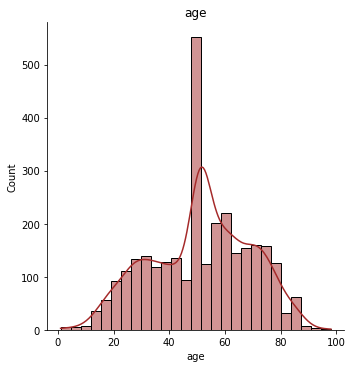

<Figure size 1000x300 with 0 Axes>

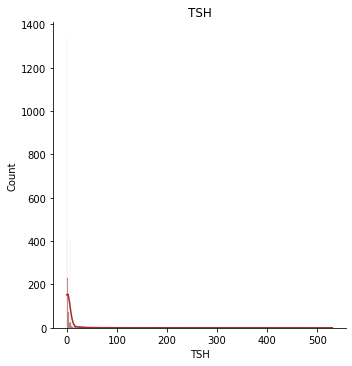

<Figure size 1000x300 with 0 Axes>

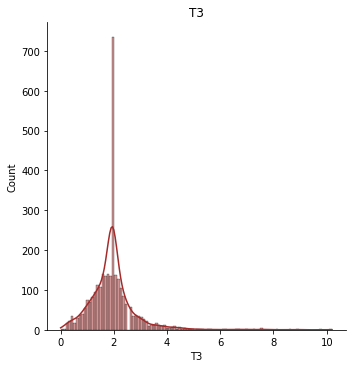

<Figure size 1000x300 with 0 Axes>

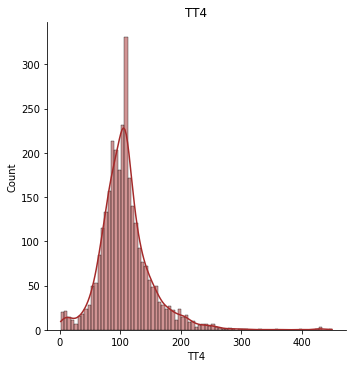

<Figure size 1000x300 with 0 Axes>

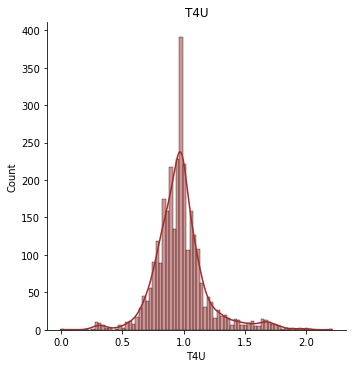

<Figure size 1000x300 with 0 Axes>

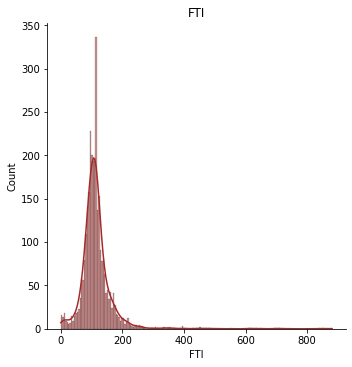

In [ ]:
# Plotting the price histogram
#
col = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for i in col:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(thyroid_clean[i], kde = True, color = 'brown')
  plt.title(i, color = 'Black')
  plt.show()

> Age and T4U are normally distributed \
The rest are not ie they are right skewed

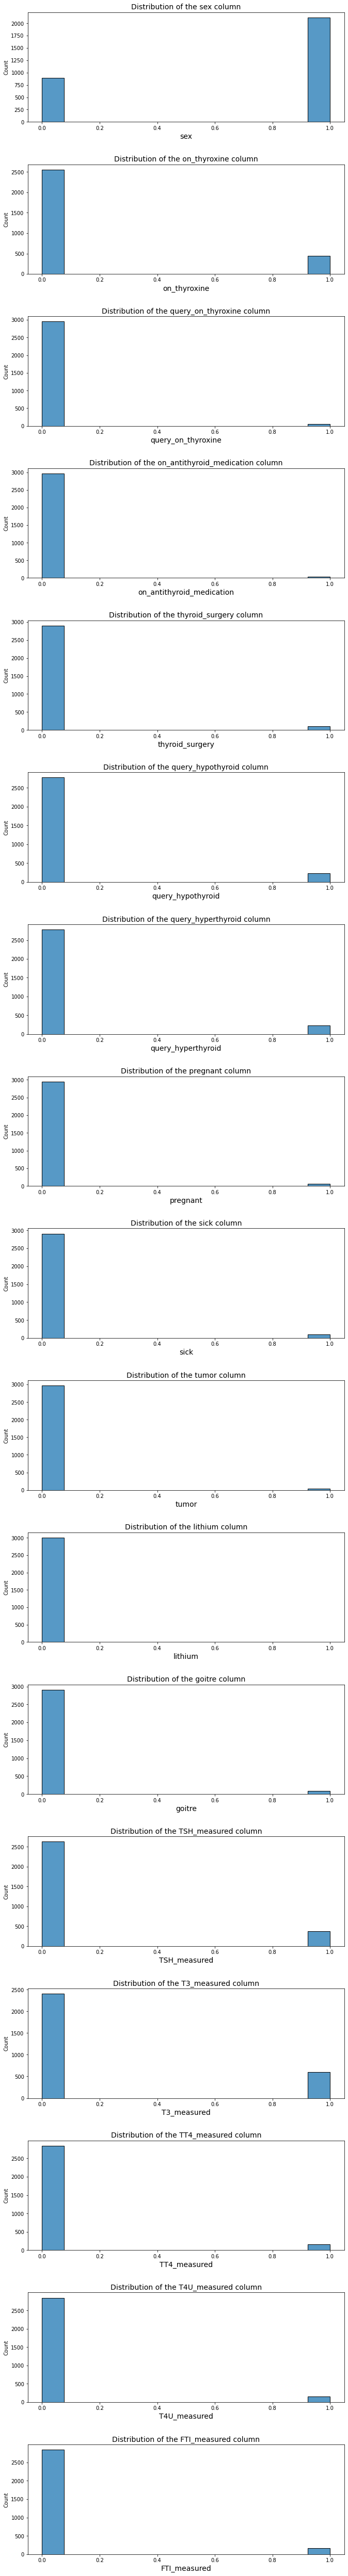

In [ ]:
# Creating a distributions for the 0,1 columns
# ---

col_names = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured']
fig, ax = plt.subplots(len(col_names), figsize = (10,70))
for i, col_val in enumerate(col_names):

    sns.histplot(x = thyroid_clean[col_val], ax=ax[i])
    ax[i].set_title('Distribution of the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].figure.tight_layout(pad=3.0)
plt.show()

> Females have the highest number of records than male.

> The following columns; on_thyroxine, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre have 0 (False) as the most records.

> The columns TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured have 0 (No) as the most records


### Bivariate Analysis

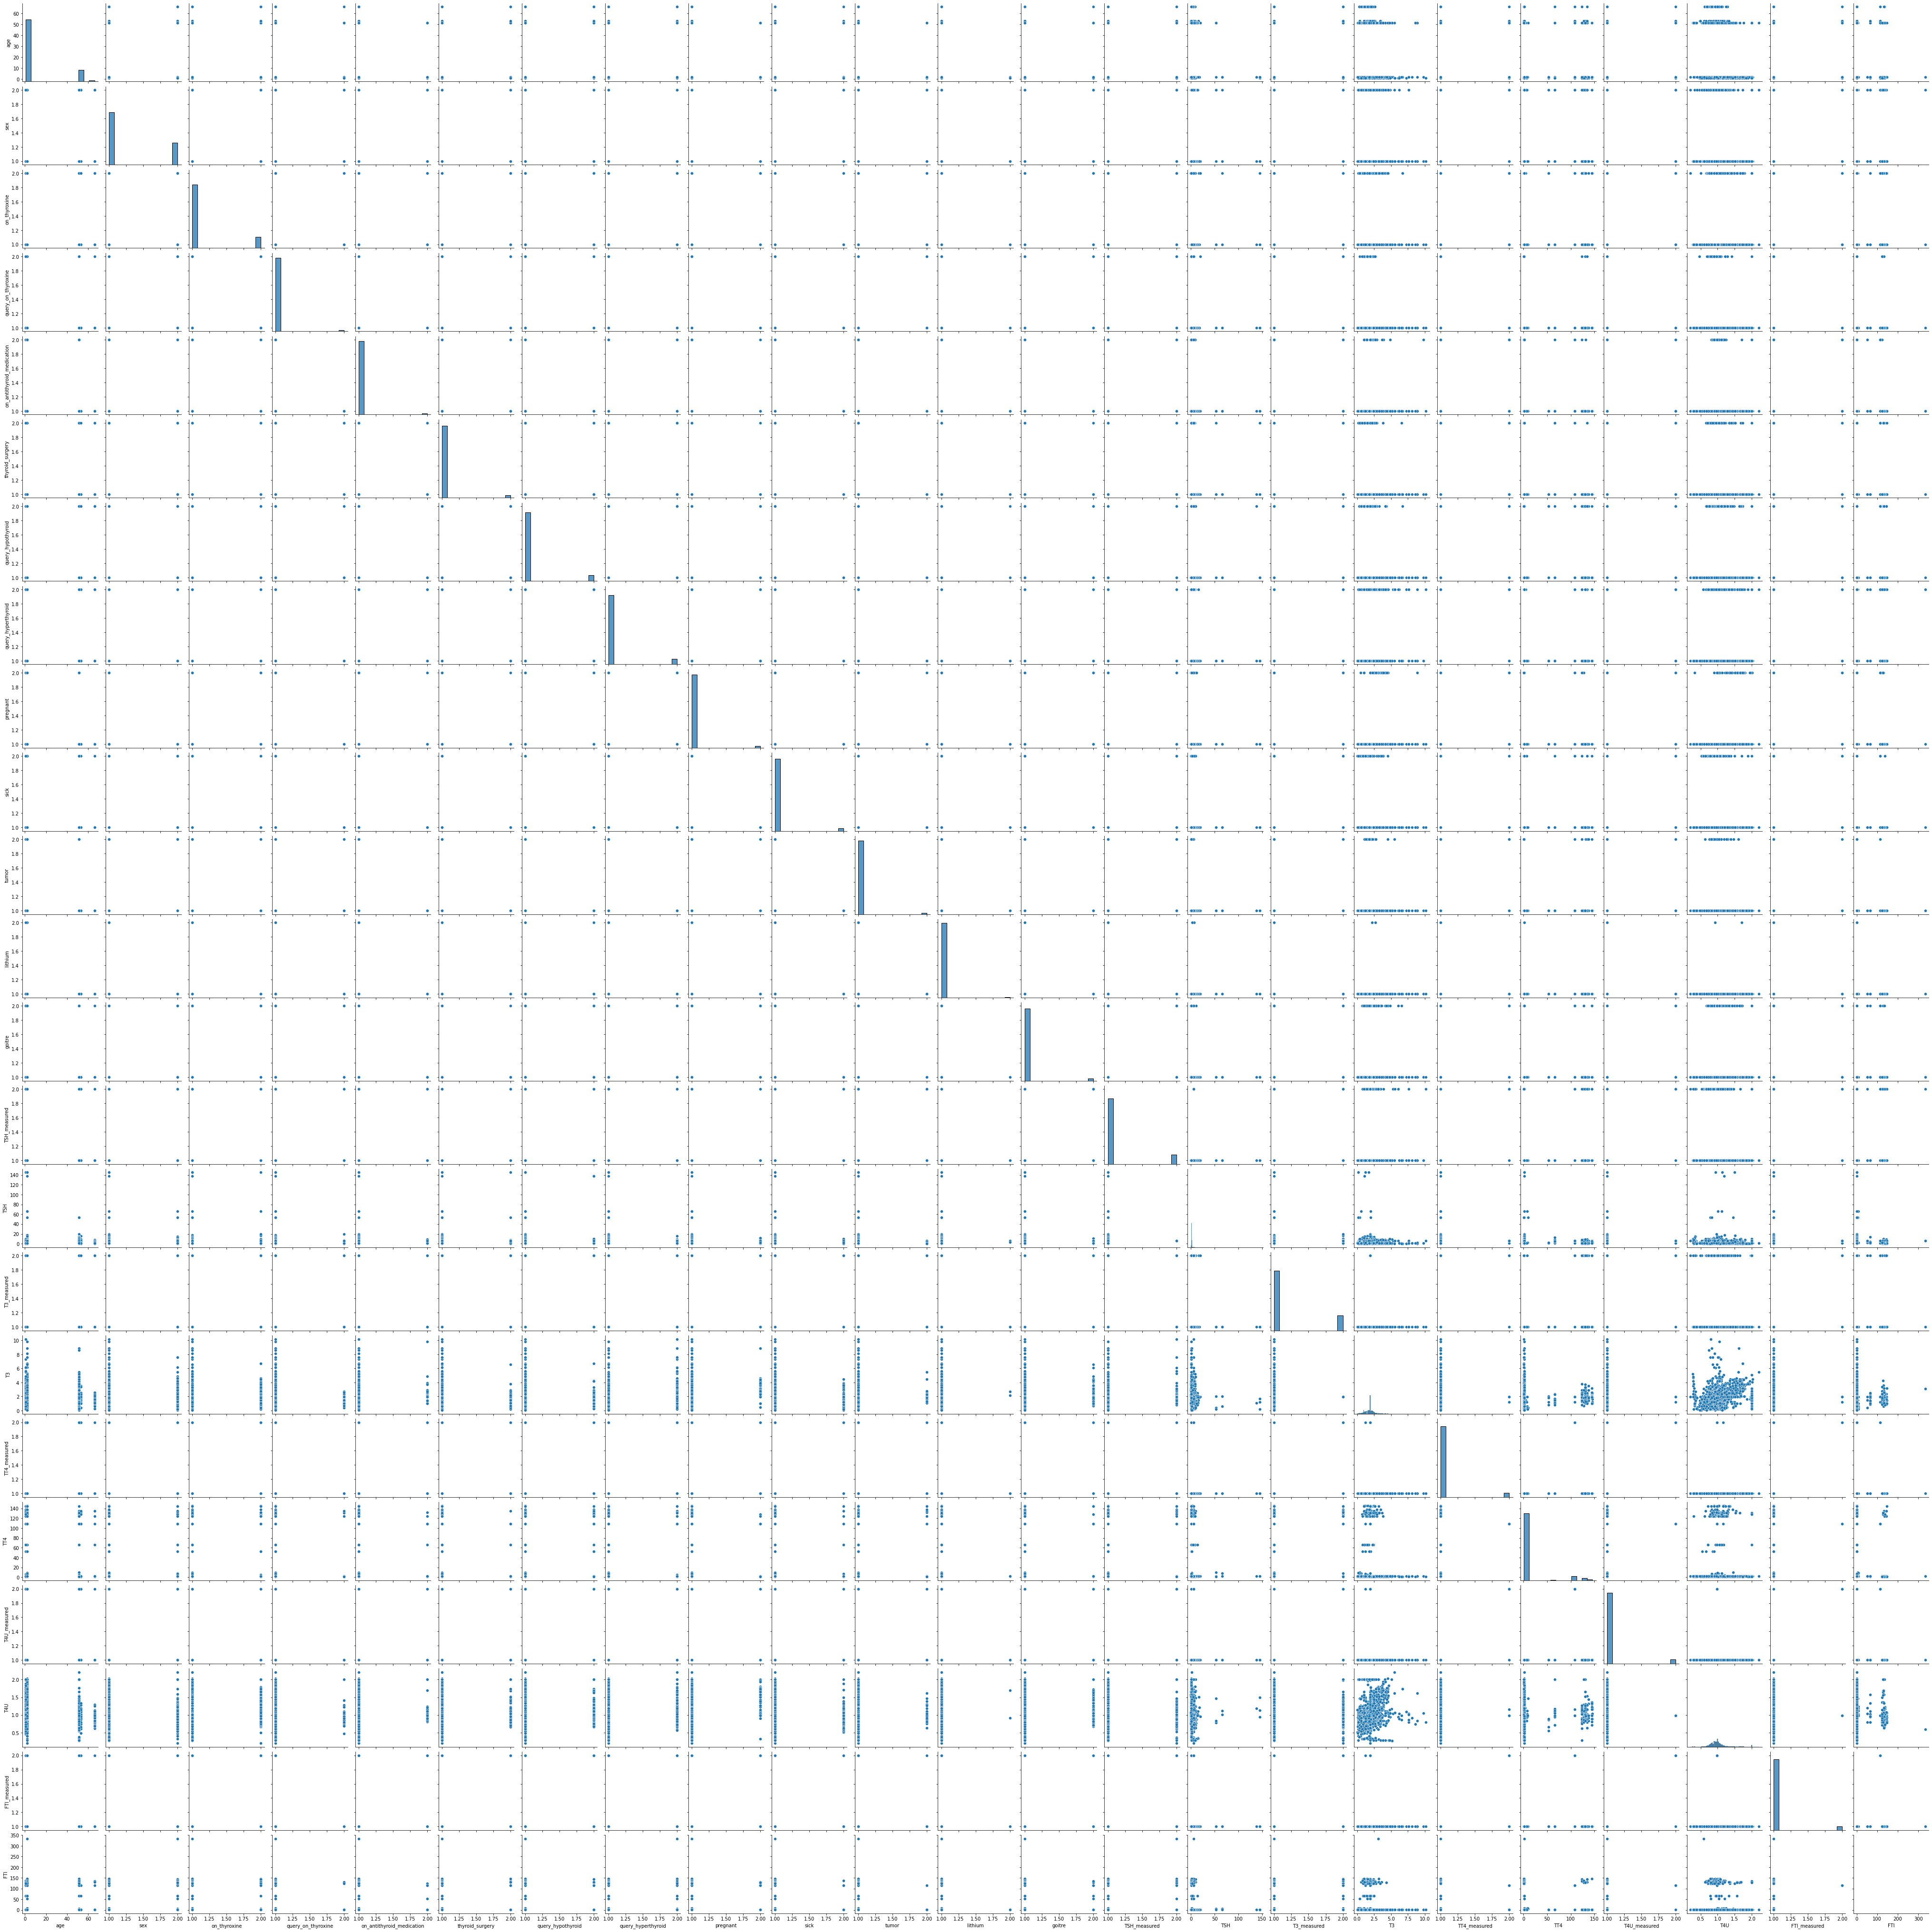

In [ ]:
# Plotting pairplots

sns.pairplot(thyroid_clean)

plt.show()

> The scatterplot graph shows that the variable price has a strong correlation to Square feet area of living area.

> This is because as the variable Sqft living increases the price also increases exhibiting a direct proportional relation.

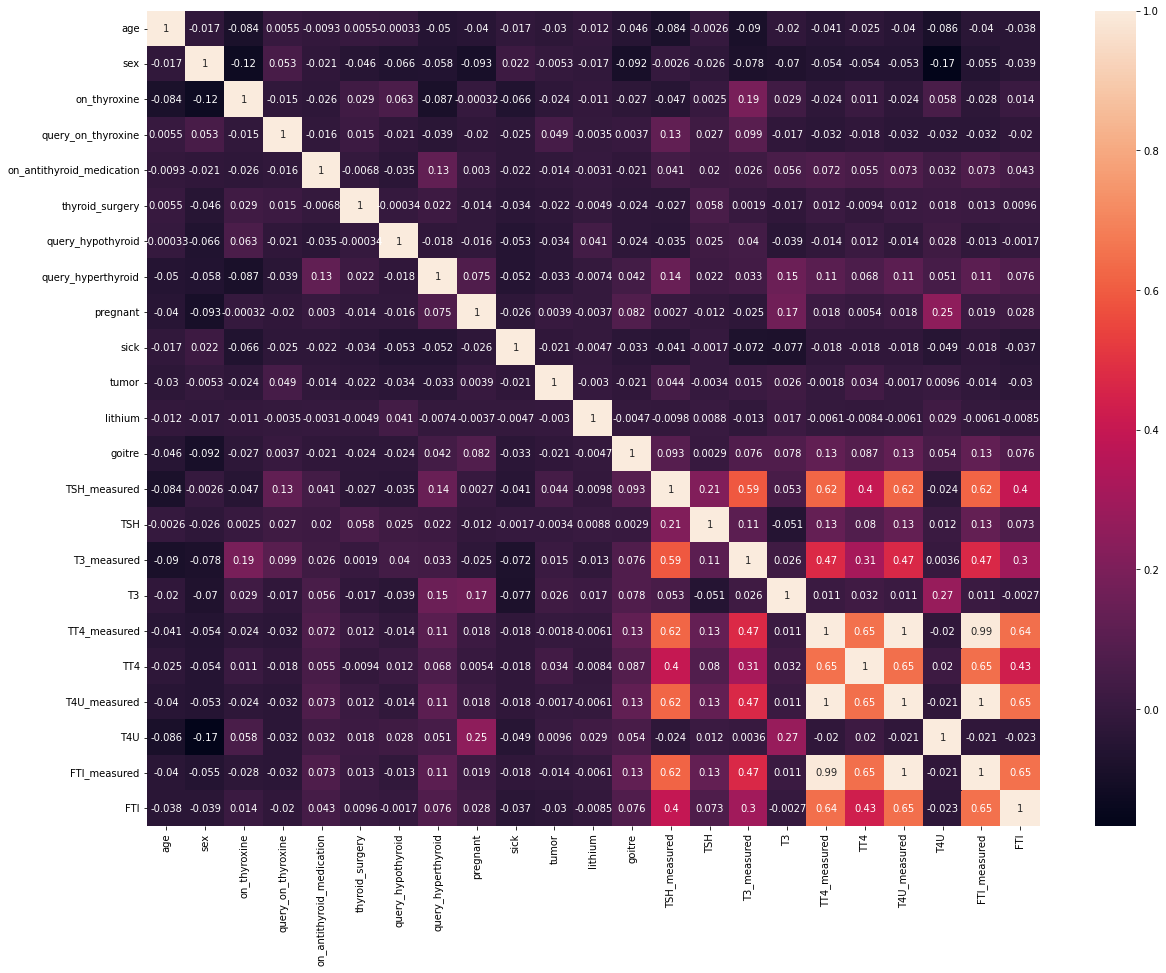

In [ ]:
# Plotting a correlation matrix

plt.subplots(figsize=(20,15))
sns.heatmap(thyroid_clean.corr(), annot=True)
plt.show()


> TT4 measured and FTI measured have a very high positive correlation of 0.99 indicating that whenone increases the other also increases 

### Multivariate Analysis

> Linear Discriminant Analysis (LDA) is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

> We decided to go with this because we had a known target variable which was dependent on other variables

In [ ]:
# encode the status variable 
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
thyroid_clean['status_enc']= label_encoder.fit_transform(thyroid_clean['status'])
 
thyroid_clean.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,status_enc
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


In [ ]:
# Drop the status categorical column
# hypothyroid = 0  negative = 1
thyroid_clean = thyroid_clean.drop('status',axis = 1)
thyroid_clean.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,status_enc
0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


In [ ]:
# dividing our df into features and corresponding labels
feat = thyroid_clean.drop(['status_enc'], 1)
group_label= thyroid_clean['status_enc']

feat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.8,0,1.7,0,86.0,0,0.91,0,95.0
3159,29.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.8,0,1.8,0,99.0,0,1.01,0,98.0
3160,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.2,0,0.6,0,71.0,0,0.68,0,104.0
3161,74.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.3,0,0.1,0,65.0,0,0.48,0,137.0


In [ ]:
# subject our features to LDA
# import LDA method from sklearn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# create an instance of lda
lda = LDA()

lda_ = lda.fit(feat, group_label)
lda_feat = lda_.transform(feat)

# Display the coefficient of the reduced columns
lda_.coef_

array([[-8.42817262e-03, -1.51227881e-01, -2.35793467e-01,
         8.72641591e-01,  1.04583713e+00, -1.18445255e+00,
         8.14835574e-03, -9.64515927e-01,  9.86611174e-01,
         1.18591074e+00,  1.28630486e+00,  3.77640579e+00,
        -7.04641909e-01,  1.49906222e+00, -1.73196816e-01,
        -5.12509635e-03,  1.85734719e-01,  1.19968411e+00,
         6.93470463e-02, -2.66536923e+00, -7.90946534e+00,
         2.13140606e+00, -1.68735845e-02]])

In [ ]:
# since coefficient are in an array, we need to create a df so that we can retrieve name of columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
lithium,3.776406
FTI_measured,2.131406
TSH_measured,1.499062
tumor,1.286305
TT4_measured,1.199684
sick,1.185911
on_antithyroid_medication,1.045837
pregnant,0.986611
query_on_thyroxine,0.872642
T3,0.185735


> All columns with positive values, those are lithium,TSH_measured, T3, sick, query_on_thyroxine,	tumor, on_thyroxine,	FTI_measured,	pregnant , on_antithyroid_medication,	TT4_measured,	query_hypothyroid, TT4 have a direct proportional relationship with status, ie when one increases the others also increase. \
Also these columns can be used to predict the target variable which is status.

> For the columns with negative values those are 	T3_measured,query_hyperthyroid, sex, TSH, on_thyroxine, goitre, age,	FTI, thyroid_surgery,	T4U_measured, T4U they have an inverse relationship with status ie when one increases the other decreases.

## Modelling

### Random Forest

In [ ]:
thyroid_clean.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,status_enc
0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the independent and dependent variables
y = thyroid_clean['status_enc'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = thyroid_clean[test_features].values


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Train using 70% of the data.
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a decision tree classifier

tree = DecisionTreeClassifier(max_depth=5,min_samples_split = 10)

# Train it on our training set.
tree = tree.fit(X_train_tree, y_train_tree)

# Predict based on the model we've trained
y_pred_tree = tree.predict(X_test_tree)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_tree, y_pred_tree)* 100)

Accuracy: 99.00332225913621


In [ ]:
# Train using 70% of the data.
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=100,random_state=42, min_samples_split = 20, max_depth=3)

# Train the Random Forest model 
forest = forest.fit(X_train_forest, y_train_forest)

# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test_forest)

comparison_frame = pd.DataFrame({'Actual': y_test_forest.flatten(), 'Predicted': y_pred_forest.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,903.000000,903.000000
mean,0.961240,0.968992
std,0.193129,0.173435
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


> Adjusted the parameters n_estimators, random_state, min_samples_split, max_depth with the values that gave me the maximum accuracy

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_forest, y_pred_forest) * 100)

Accuracy: 98.56035437430786


> The model has an accuracy of 98.56%

In [ ]:
# Make a prediction
forest.predict([[30,1,0,0,1,0,1,1,1,0,0,1,0,1,150,0,1.2,1,5.0,0,1.45,0,40]])

array([0])

> The model predicted that with the above conditions the result is 0 ie the patient has hypothyroid

### Gradient Boosting

In [ ]:
# Let's start with Gradient boosted classifier
# We use decision trees when performing gradient boosting 
# We will start by setting different learning rates and comparing the performance of the classifier 
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_tree, y_train_tree)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training):", gb_clf.score(X_train_tree, y_train_tree))
    print("Accuracy score (validation):", gb_clf.score(X_test_tree, y_test_tree))
    print("                                                                                    ")
    print("*********************************************************************************")

Learning rate:  0.05
Accuracy score (training): 0.9900190114068441
Accuracy score (validation): 0.9844961240310077
                                                                                    
*********************************************************************************
Learning rate:  0.075
Accuracy score (training): 0.9914448669201521
Accuracy score (validation): 0.9867109634551495
                                                                                    
*********************************************************************************
Learning rate:  0.1
Accuracy score (training): 0.9914448669201521
Accuracy score (validation): 0.9889258028792912
                                                                                    
*********************************************************************************
Learning rate:  0.25
Accuracy score (training): 0.9976235741444867
Accuracy score (validation): 0.9900332225913622
                                       

> We choose the learning rate withthe highest accuracy it 0.25

In [ ]:
# Fit the model with our new hyperparameter
gb_clf2 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25, max_features=2, max_depth=3, random_state=0)
gb_clf2.fit(X_train_tree, y_train_tree)
predictions = gb_clf2.predict(X_test_tree)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_tree, predictions) * 100)

Accuracy: 99.1140642303433


> The models accuracy compared to the decision tree improved.\
The parameters used (n_estimators, learning_rat, max_feature, max_depth, random_state) have been tweaked to give the max accuracy

### Support Vector Machine

In [ ]:
# Importing the libraries we need
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has a lot of features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

# Removing the target column
thyroid = thyroid_clean.drop('status_enc', axis=1)
y = thyroid_clean['status_enc']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(thyroid)
X = pca.transform(thyroid)
X.shape

(3007, 2)

#### Fitting the model: Polymomial function

In [ ]:
# Splitting our data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.978405315614618
[[ 18   7]
 [  6 571]]


#### Fitting the model: Radial basis function (rbf)

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC()

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

# Model Evaluation
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9817275747508306
[[ 18   7]
 [  4 573]]


#### Fitting the model: Sigmoid function

In [ ]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
# making prediction
y_pred = sigclassifier.predict(X_test)

# Model Evaluation
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9584717607973422
[[  0  25]
 [  0 577]]


> When we compare the performance of the three kernel, it clear that sigmoid performs the worst. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.\
On the other hand, we can see that the rbf kernel also know as **Gaussian Kernel** achieved a 98% prediction rate making it the highest of the three.

## Challenging The Solution

### AdaBoosting

In [ ]:
# We are going to be using Adaboost to challenge the Gradient boost solution
# Import the necessary package
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators= 200, learning_rate= 1, random_state= 0)

# Fit the model
ada_clf.fit(X_train_tree, y_train_tree)

pred = ada_clf.predict(X_test_tree)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_tree, pred)) 

Accuracy: 0.9889258028792912


> The models accuracy did not improve (it was actually less) therefore going with Gradient Boost would be the best option

## 9. Follow up questions

### a). Did we have the right data?

Yes we did

### b). Do we need other data to answer our question?

No our data was sufficient to perform our analysis

### c). Did we have the right question?

Yes we did